# ИДЗ 2 часть 1
# 0381 Захаров Филипп Вариант 4

In [1]:
import matplotlib.pyplot as plt
from collections import Counter
import statistics
from scipy.stats import skew

### 1a - Вариационный ряд

Сортируем таблицу по возрастанию

In [2]:
data = "3 2 3 4 2 2 2 0 3 1 0 2 1 3 0 0 0 2 1 4 4 1 2 0 4 2 3 4 3 2 2 1 4 3 2 1 4 2 0 4 2 1 2 3 2 1 0 3 3 0".split()
data = sorted(map(int, data))

print("Вариационный ряд:")
print(*data)
print()

Вариационный ряд:
0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4



### 1a - Гистограмма частот

Гистограмма зависимости числа в списке от того, как оно часто встречаются.

Частота повторений:
{0: 9, 1: 8, 2: 15, 3: 10, 4: 8}


Text(0, 0.5, 'Частота')

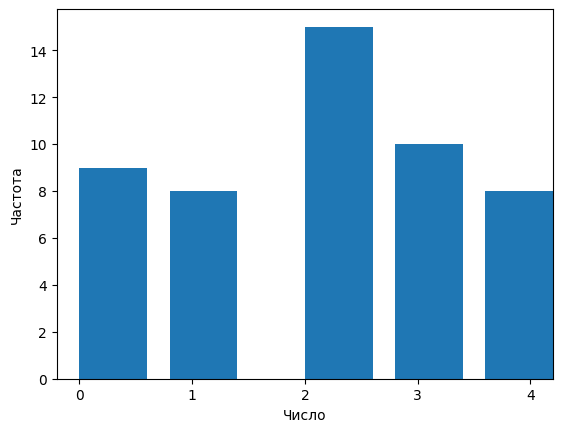

In [3]:
frequency = dict(Counter(data))
print("Частота повторений:")
print(frequency)
plt.hist(data, width=0.6)
plt.xticks(range(0, 5))
plt.xlabel("Число")
plt.ylabel("Частота")### 1a - Вариационный ряд

### 1a - Эмпирическая функция распределения

Эмпирическая функция распределения F(x) показывает для каждого x значение X<x. График немного неправильный, после 4 линия должна быть горизонтальной, т.к. все числа в выборке меньше него.

C:\Users\Filip\AppData\Local\Temp\ipykernel_17944\1764165057.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1])


(array([ 9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9., 17.,
        17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 32.,
        32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 42., 42.,
        42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 50.]),
 array([0.  , 0.08, 0.16, 0.24, 0.32, 0.4 , 0.48, 0.56, 0.64, 0.72, 0.8 ,
        0.88, 0.96, 1.04, 1.12, 1.2 , 1.28, 1.36, 1.44, 1.52, 1.6 , 1.68,
        1.76, 1.84, 1.92, 2.  , 2.08, 2.16, 2.24, 2.32, 2.4 , 2.48, 2.56,
        2.64, 2.72, 2.8 , 2.88, 2.96, 3.04, 3.12, 3.2 , 3.28, 3.36, 3.44,
        3.52, 3.6 , 3.68, 3.76, 3.84, 3.92, 4.  ]),
 [<matplotlib.patches.Polygon at 0x23fff4b6440>])

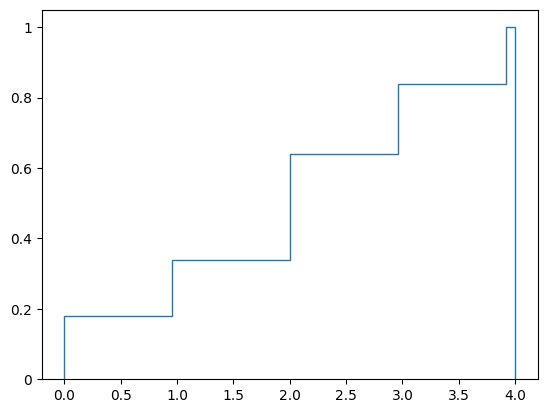

In [4]:
ax = plt.axes()
ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.hist(data, histtype='step', cumulative=True, bins=len(data))


### 1b

1. Выборочное среднее - сумма всех значений списка на длину списка.

In [5]:
avg = sum(data) / len(data)
avg

2.0

2. Дисперсия - среднее значение квадратов всех отклонений от среднего.

In [6]:
n = len(data)
disp = sum([(i - avg) ** 2 for i in data]) / n
disp

1.72

3. Медиана - число, которое находится в середине набора

In [7]:
print(statistics.median(data))

2.0


4. Асимметрия - 
$$
\frac{sum((x_i - \overline{x})^3)}{n * D^{3/2}}
$$

Первая формула - обычными вычислениями, вторая - с помощью библиотки scipy, чтоб проверить разницу. Надеюсь, она появилась из-за машинной арифметики питона. Во втором задании разница огромная, значит где-то и тут ошибка, без понятия где...

In [8]:
sum([(i - avg) ** 3 for i in data]) / n / (disp ** 3/2)

-0.047165658369703295

In [9]:
skew(data, axis=0, bias=False)

-0.054856788693609666

5. Коэффициент эксцесса - 
$$
\frac{sum((x_i - \overline{x})^4)}{n * D^{2}} - 3
$$

In [10]:
sum([(i - avg) ** 4 for i in data]) / n / (disp ** 2) - 3

-1.039480800432666

6. Вероятность Pr(X ∈ [a, b]). - вероятность того, что случайно выбранный x в выборке находится в границах a и b. 

In [11]:
def pr(data, a, b):
    n = len(data)
    count = 0
    for i in data:
        if (a <= i <= b):
            count += 1
    return count / n

print(round(pr(data, 1.15, 3.13), 5))


0.5


# Другие задания писал от руки